## Demo

In [ ]:
# @title Run to Clone
!git clone --branch main https://github.com/juelha/CompetingHiddenUnits.git
%cd CompetingHiddenUnits

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import ipywidgets as widgets
from src import *

In [2]:
df_dropdown = widgets.Dropdown(
    options=[("mnist", "mnist"), ('XOR', 'xor'), ('fashion_mnist', 'fashion_mnist')],
    value="mnist",
    description='Choose a Dataset:',
)
display(df_dropdown)

Dropdown(description='Choose a Dataset:', options=(('mnist', 'mnist'), ('XOR', 'xor'), ('fashion_mnist', 'fash…

In [3]:
# load data
df_name = df_dropdown.value
inputs, labels = load_data(df_name)

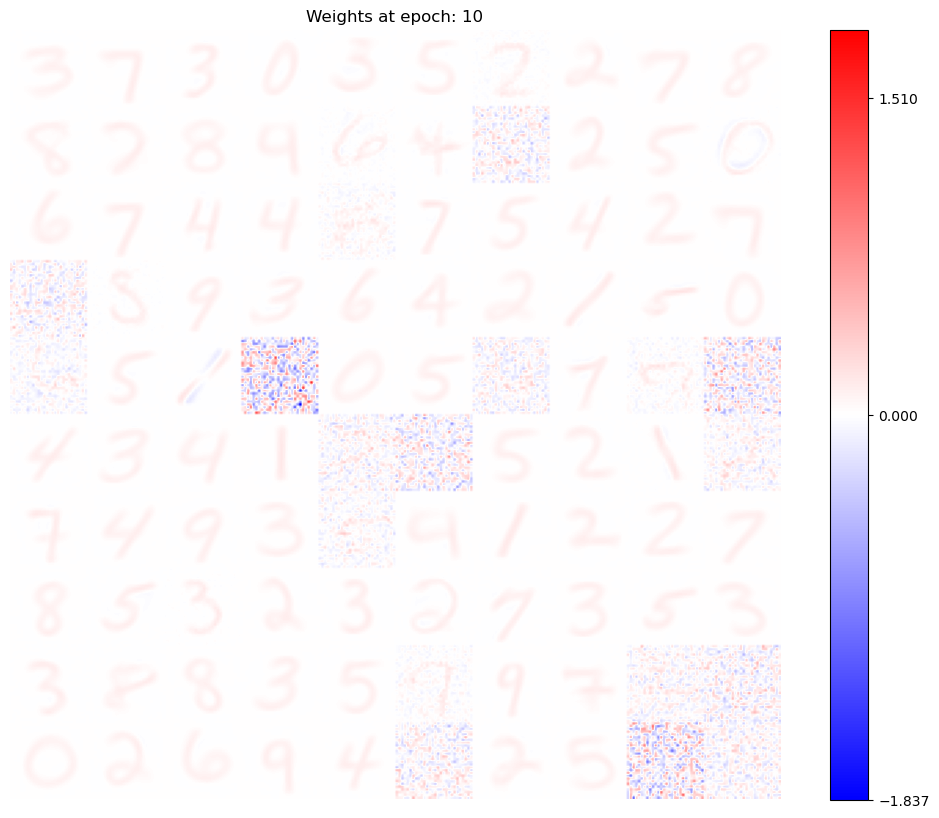

In [4]:
# train unsupervised layer 
n_hidden = 100
n_epochs = 10
weights = biolearning(inputs, n_hidden, n_epochs, df_name, show=True)
save_weights(weights, df_name, notes=f"Epoch{n_epochs}_{n_hidden}hidden")

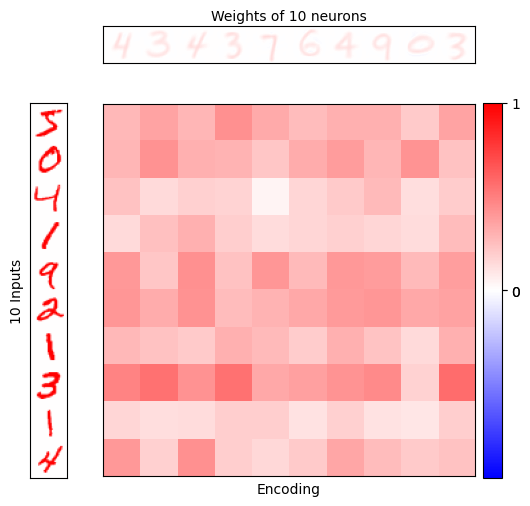

In [5]:
# "encoding" all the inputs by running them through unsupervised layer
n_hidden = 100
n_epochs = 200
weights = load_weights(df_name, notes=f"Epoch{n_epochs}_{n_hidden}hidden")
encoding = np.dot(weights, inputs.T)
# encoding = np.where(encoding<0, 0, encoding) # RELU <- performance on xor better without relu and seems to be more stable 
encoding /= np.max(np.absolute(encoding))
encoding = encoding.T # make encoding have shape (n_samples, n_hidden)

monitoring(weights, inputs, encoding, df_name)

SGD-learning: 100%|██████████| 40/40 [00:00<00:00, 47.22it/s]


Training Loop completed with a test error of 43.3195960200076


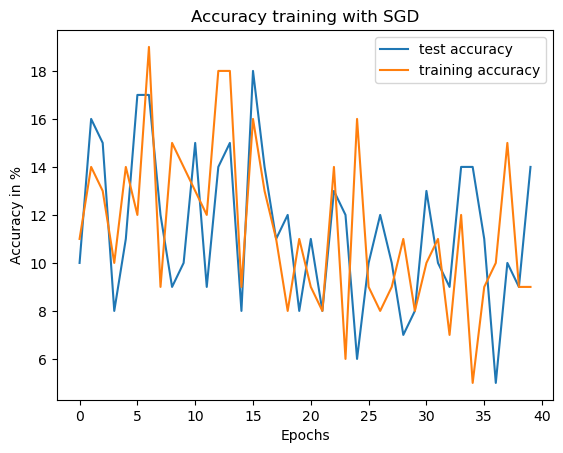

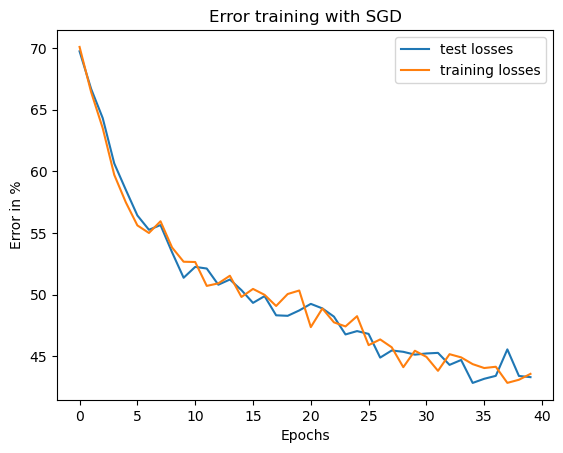

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [6]:
# train supervised trainer 
train = Trainer(n_inputs = n_hidden, n_outputs = labels.shape[1])
train.training_loop(encoding, labels)
train.visualize_accuracy(df_name, show=True)
train.visualize_error(df_name, show=True)